# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data

In [2]:
# Note: to [GET] [C]urrent [W]orking [D]irectory run
# import os
# os.getcwd()
credit = pd.read_csv('Data/default of credit card clients.csv', 
                     header = 1)

# Wrangle Some

In [3]:
# Change 'SEX' into objects 'M'/'F'
# gender_to_categories = {'SEX': {1: 'M', 2: 'F'}}
# credit.replace(gender_to_categories, inplace = True)

In [4]:
# rename : 
# that ridiculous last column name to something workable
# PAY_.. etc to Status Month
# BILL_AMT.. to Bill Month
# PAY_AMT.. to Paid Month
credit.rename(columns = {'LIMIT_BAL' : 'Limit',
                         'SEX': 'Sex',
                         'EDUCATION': 'Education',
                         'MARRIAGE': 'Marriage',
                         'AGE': 'Age',
                         'default payment next month': 'Default',
                         'PAY_0': 'StatusSep', 'PAY_2': 'StatusAug', 'PAY_3': 'StatusJul',
                         'PAY_4': 'StatusJun', 'PAY_5': 'StatusMay', 'PAY_6': 'StatusApr',
                         'BILL_AMT1': 'BillSep', 'BILL_AMT2': 'BillAug', 'BILL_AMT3': 'BillJul',
                         'BILL_AMT4': 'BillJun', 'BILL_AMT5': 'BillMay', 'BILL_AMT6': 'BillApr',
                         'PAY_AMT1': 'PaidSep', 'PAY_AMT2': 'PaidAug', 'PAY_AMT3': 'PaidJul',
                         'PAY_AMT4': 'PaidJun', 'PAY_AMT5': 'PaidMay', 'PAY_AMT6': 'PaidApr',
                        },
                  inplace = True)

In [5]:
# Change the 'Education' values
# 0 = NA
# 4, 5, 6 = Other
# Change all above to 4 and intepret as Other/NA
# Assumption : In general, the order (1 > 2 > 3 > 4) will hold
credit['Education'] = credit['Education'].replace([0 , 5, 6], 4)

In [10]:
# Change the 'Marriage' values
# 0 = NA
# 3 = Other
# Change all above to 3 and intepret as Other/NA
# Additionally : Check how to set as factor
# https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

credit['Marriage'] = credit['Marriage'].replace([0, 3], 2)

In [7]:
# (?)
# Change the 

# Note: 1 NTD (new taiwan dollar) = € 0.03
# divide all 'Limit' 'Bill' and 'Paid' by 0.03
# .dtypes.index # gives column names
# columns_in_NTD = ['Limit',
  #                'Bill Sep', 'Bill Aug', 'Bill Jul', 'Bill Jun', 'Bill May', 'Bill Apr',
   #               'Paid Sep', 'Paid Aug', 'Paid Jul', 'Paid Jun', 'Paid May', 'Paid Apr']

# credit.loc[:,columns_in_NTD] = credit.loc[:,columns_in_NTD].div(34).round()

In [ ]:
# Create a variable that captures how often payment was delayed
test=[]
for i in range(len(credit)):
    temp_val =  sum(credit.iloc[i, 'StatusSep', ''] == 0)
    test.append(temp_val)
credit_df_ver2['times_use_of_revolving_credit'] = test

In [9]:
# take out variables
# collinearity : 'BillAug', 'BillJun', 'BillApr' 
# useless : 'ID'
credit.drop(['BillAug', 'BillJun', 'BillApr', 'ID'], axis = 1, inplace = True)

In [7]:
# take out variables
# collinearity : 'BillAug', 'BillJun', 'BillApr' 
# useless : 'ID'
credit.drop(['ID'], axis = 1, inplace = True)

In [73]:
# Create a variable that captures how often payment was delayed

# make a df with only status variables
creditStatus = credit.loc[: , 'StatusSep': 'StatusApr']

# create empty list
delay_list = []

# run loop and fill list
for i in range(len(creditStatus)):
    sum_status =  sum(creditStatus.loc[i, :] > 0)
    delay_list.append(temp_val)

# add info in list to original df
credit['totalDelayed'] = delay_list

In [84]:
# Create var : times that payment is delayed

# for every row in credit
# 'SumDelay' = the sum of times when payements where delayed 
# (indiscriminatory of the amount of months a payment was delayed)
for i in range(len(credit)):
    credit.loc[i , 'SumDelay'] =  sum(credit.loc[i , 'StatusSep': 'StatusApr'] > 0)


In [ ]:
# [f(x) if condition else g(x) for x in sequence]

In [25]:
# Save the resulting data set
credit.to_csv('Data/creditClean.csv', index = False)

In [12]:
# Save the resulting data set
credit.to_csv('Data/creditCleanAllBills.csv', index = False)

# Explore

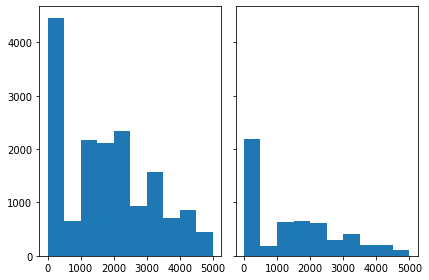

Wall time: 187 ms


In [43]:
%%time

pay = credit[(credit.PaidSep < 5000) & (credit.Default == 0)].PaidSep.copy()
default = credit[(credit.PaidSep < 5000) & (credit.Default == 1)].PaidSep.copy()

fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)

# set the number of bins with the `bins` kwarg
n_bins = 10


axs[0].hist(pay, 
            bins = n_bins)
axs[1].hist(default, 
            bins = n_bins)

plt.show()

In [29]:
credit[(credit.PaidSep < 5000)].PaidSep.count()

21738

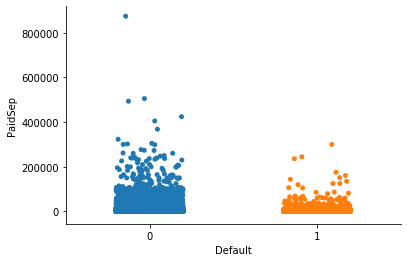

In [31]:
sns.stripplot('Default', 'PaidSep',
              data = credit,
              jitter = 0.2)
sns.despine()

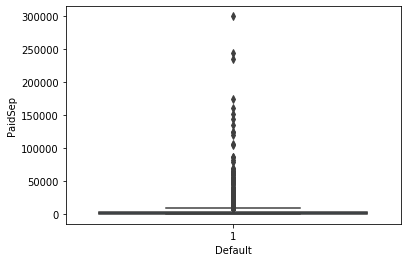

In [34]:
sns.boxplot(y = 'PaidSep',
           x = 'Default',
           data = credit[(credit.PaidSep < 600000) &
                        (credit.Default == 1)])

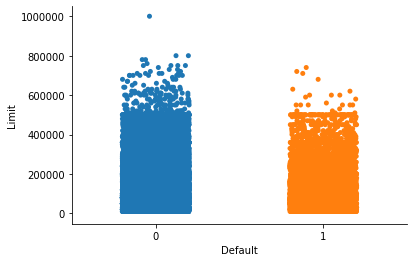

In [13]:
sns.stripplot('Default', 'Limit',
              data = credit,
              jitter = 0.2)
sns.despine()

In [ ]:
sns.countplot(x = "StatusSep", hue = "Default",
              data = credit,
              palette = "Set1")
sns.despine()

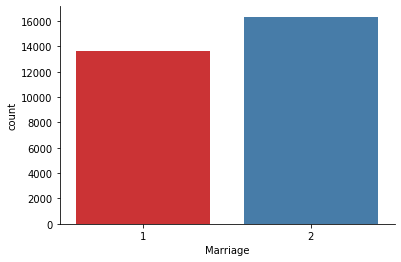

In [11]:
sns.countplot(x = "Marriage",
              data = credit,
              palette = "Set1")
sns.despine()

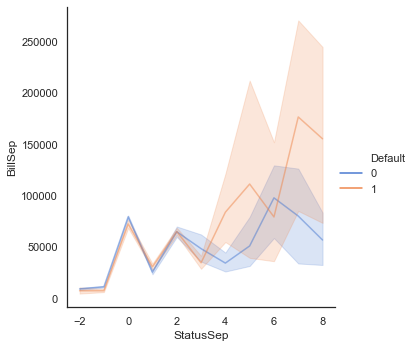

In [44]:
# Plot StatusSep against BillSep
# with color = 'Default'
sns.set(style = "white")
sns.relplot(x = "StatusSep", 
            y = "BillSep",
            hue = "Default",
            alpha=.5,
            kind = "line",
            palette = "muted",
            data = credit)

plt.show()

In [61]:
# Number of people that in each class (default Y/N)
credit.groupby(['Sex', 'Marriage', 'Default']).count()

Limit  Education   Age  StatusSep  StatusAug  StatusJul  \
Sex Marriage Default                                                            
1   1        0         3844       3844  3844       3844       3844       3844   
             1         1346       1346  1346       1346       1346       1346   
    2        0         5171       5171  5171       5171       5171       5171   
             1         1527       1527  1527       1527       1527       1527   
2   1        0         6609       6609  6609       6609       6609       6609   
             1         1860       1860  1860       1860       1860       1860   
    2        0         7740       7740  7740       7740       7740       7740   
             1         1903       1903  1903       1903       1903       1903   

                      StatusJun  StatusMay  StatusApr  BillSep  ...  BillJul  \
Sex Marriage Default                                            ...            
1   1        0             3844       3844       3844     3844  ...     3844   
             1             1346       1346       1346     1346  ...     1346   
    2        0             5171       5171       5171     5171  ...     5171   
             1             1527       1527       1527     1527  ...     1527   
2   1        0             6609       6609       6609     6609  ...     6609   
             1             1860       1860       1860     1860  ...     1860   
    2        0             7740       7740       7740     7740  ...     7740   
             1             1903       1903       1903     1903  ...     1903   

                      BillJun  BillMay  BillApr  PaidSep  PaidAug  PaidJul  \
Sex Marriage Default                                                         
1   1        0           3844     3844     3844     3844     3844     3844   
             1           1346     1346     1346     1346     1346     1346   
    2        0           5171     5171     5171     5171     5171     5171   
             1           1527     1527     1527     1527     1527     1527   
2   1        0           6609     6609     6609     6609     6609     6609   
             1           1860     1860     1860     1860     1860     1860   
    2        0           7740     7740     7740     7740     7740     7740   
             1           1903     1903     1903     1903     1903     1903   

                      PaidJun  PaidMay  PaidApr  
Sex Marriage Default                             
1   1        0           3844     3844     3844  
             1           1346     1346     1346  
    2        0           5171     5171     5171  
             1           1527     1527     1527  
2   1        0           6609     6609     6609  
             1           1860     1860     1860  
    2        0           7740     7740     7740  
             1           1903     1903     1903  

[8 rows x 21 columns]

In [30]:
# Correlation Matrix

corr_headers = ['Limit', 
                'StatusSep', 'StatusAug', 'StatusJul', 'StatusJun', 'StatusMay', 'StatusApr',
                'BillSep', 'BillAug', 'BillJul', 'BillJun', 'BillMay', 'BillApr',
                'PaidSep', 'PaidAug', 'PaidJul', 'PaidJun', 'PaidMay', 'PaidApr',
                'Default']

# alternatively,
# crazyCorr = credit[['Limit'] + list(credit.loc[ : , 'StatusSep' : 'Default'])].corr()
# or,
# corr_headers =  credit[['Limit'] + list(credit.loc[ : , 'StatusSep' : 'Default'])].dtypes.index

corrMat = credit[corr_headers].corr()

corrMat[(corrMat[corr_headers] > 0.9) &
       (corrMat[corr_headers] < 1)]

# Result = The Billing Amounts are often correlated to each other
# Either : Take out half of them (Aug, Jun, Apr)   <<<  see below
# Or : Take them all out

,Limit,StatusSep,StatusAug,StatusJul,StatusJun,StatusMay,StatusApr,BillSep,BillAug,BillJul,BillJun,BillMay,BillApr,PaidSep,PaidAug,PaidJul,PaidJun,PaidMay,PaidApr,Default
Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StatusSep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StatusAug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StatusJul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StatusJun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StatusMay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StatusApr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BillSep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BillAug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951484,NaN,0.928326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BillJul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928326,NaN,0.923969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# heat map : correlation matrix 
credit.corr().style.background_gradient(cmap = 'seismic', 
                                        axis = None,
                                        low = 0.3).set_precision(2)

,Limit,Sex,Education,Marriage,Age,StatusSep,StatusAug,StatusJul,StatusJun,StatusMay,StatusApr,BillSep,BillAug,BillJul,BillJun,BillMay,BillApr,PaidSep,PaidAug,PaidJul,PaidJun,PaidMay,PaidApr,Default
Limit,1,0.025,-0.23,-0.1,0.14,-0.27,-0.3,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.3,0.29,0.2,0.18,0.21,0.2,0.22,0.22,-0.15
Sex,0.025,1,0.014,-0.03,-0.091,-0.058,-0.071,-0.066,-0.06,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0.00024,-0.0014,-0.0086,-0.0022,-0.0017,-0.0028,-0.04
Education,-0.23,0.014,1,-0.16,0.18,0.11,0.13,0.12,0.12,0.1,0.089,0.017,0.012,0.0067,-0.0061,-0.012,-0.013,-0.041,-0.033,-0.044,-0.041,-0.045,-0.044,0.034
Marriage,-0.1,-0.03,-0.16,1,-0.45,0.016,0.023,0.031,0.03,0.034,0.032,-0.025,-0.022,-0.026,-0.023,-0.025,-0.021,-0.007,-0.011,-0.0053,-0.015,-0.0022,-0.006,-0.03
Age,0.14,-0.091,0.18,-0.45,1,-0.039,-0.05,-0.053,-0.05,-0.054,-0.049,0.056,0.054,0.054,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014
StatusSep,-0.27,-0.058,0.11,0.016,-0.039,1,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.079,-0.07,-0.071,-0.064,-0.058,-0.059,0.32
StatusAug,-0.3,-0.071,0.13,0.023,-0.05,0.67,1,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.26
StatusJul,-0.29,-0.066,0.12,0.031,-0.053,0.57,0.77,1,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.0013,-0.067,-0.053,-0.046,-0.036,-0.036,0.24
StatusJun,-0.27,-0.06,0.12,0.03,-0.05,0.54,0.66,0.78,1,0.82,0.72,0.2,0.23,0.24,0.25,0.24,0.24,-0.0094,-0.0019,-0.069,-0.043,-0.034,-0.027,0.22
StatusMay,-0.25,-0.055,0.1,0.034,-0.054,0.51,0.62,0.69,0.82,1,0.82,0.21,0.23,0.24,0.27,0.27,0.26,-0.0061,-0.0032,0.0091,-0.058,-0.033,-0.023,0.2


In [105]:
# Note : covariance expresses the relation between the variances of two variables.
# Thus, it is the correlation, multiplied by the variances
# Corr(X,Y) = Cov(X,Y) / σXσY
covMat = credit.iloc[1:, 1:].cov()
covMat

,Limit,Sex,Education,Marriage,Age,StatusSep,StatusAug,StatusJul,StatusJun,StatusMay,...,BillJun,BillMay,BillApr,PaidSep,PaidAug,PaidJul,PaidJun,PaidMay,PaidApr,Default
Limit,1.683429e+10,1573.051301,-22474.056040,-7326.627124,173026.022158,-39537.332915,-46028.692097,-44437.833979,-40576.996041,-36680.309221,...,2.453795e+09,2.331361e+09,2.243721e+09,4.195573e+08,5.333425e+08,4.801083e+08,4.131102e+08,4.305564e+08,5.065065e+08,-8263.998286
Sex,1.573051e+03,0.239250,0.005500,-0.008007,-0.409588,-0.031713,-0.041472,-0.038684,-0.034402,-0.030499,...,-6.879410e+02,-5.051787e+02,-4.869329e+02,-1.889514e+00,-1.560690e+01,-7.396825e+01,-1.701693e+01,-1.239582e+01,-2.398379e+01,-0.008123
Education,-2.247406e+04,0.005500,0.624671,-0.059184,1.275478,0.093577,0.115018,0.107869,0.100535,0.087352,...,-2.273777e+01,-3.633924e+02,-4.280982e+02,-4.903188e+02,-5.469976e+02,-5.558272e+02,-4.731991e+02,-4.873287e+02,-5.226653e+02,0.009184
Marriage,-7.326627e+03,-0.008007,-0.059184,0.272451,-1.993042,0.011721,0.015162,0.020406,0.020199,0.021043,...,-7.847037e+02,-8.066094e+02,-6.599605e+02,-5.179753e+01,-9.742748e+01,-3.264331e+01,-1.036104e+02,-9.696325e+00,-6.172128e+01,-0.005259
Age,1.730260e+05,-0.409588,1.275478,-1.993042,84.968190,-0.407881,-0.552610,-0.585602,-0.536167,-0.562928,...,3.043756e+04,2.763955e+04,2.612364e+04,3.990006e+03,4.625012e+03,4.744982e+03,3.085579e+03,3.216322e+03,3.190013e+03,0.053442
StatusSep,-3.953733e+04,-0.031713,0.093577,0.011721,-0.407881,1.262836,0.904216,0.772465,0.708048,0.648881,...,1.295359e+04,1.234479e+04,1.184777e+04,-1.475164e+03,-1.814847e+03,-1.395863e+03,-1.126561e+03,-9.988184e+02,-1.171882e+03,0.151452
StatusAug,-4.602869e+04,-0.041472,0.115018,0.015162,-0.552610,0.904216,1.433150,1.098467,0.926766,0.845038,...,1.711995e+04,1.611436e+04,1.564616e+04,-1.599891e+03,-1.626874e+03,-1.177999e+03,-8.785299e+02,-6.781498e+02,-7.764899e+02,0.130909
StatusJul,-4.443783e+04,-0.038684,0.107869,0.020406,-0.585602,0.772465,1.098467,1.432517,1.087776,0.931438,...,1.749348e+04,1.638237e+04,1.584654e+04,2.551190e+01,-1.842160e+03,-1.123611e+03,-8.639251e+02,-6.559513e+02,-7.631964e+02,0.116893
StatusJun,-4.057700e+04,-0.034402,0.100535,0.020199,-0.536167,0.708048,0.926766,1.087776,1.366910,1.086153,...,1.849592e+04,1.726508e+04,1.665113e+04,-1.814488e+02,-5.249585e+01,-1.425388e+03,-7.961877e+02,-6.001363e+02,-5.522912e+02,0.105139
StatusMay,-3.668031e+04,-0.030499,0.087352,0.021043,-0.562928,0.648881,0.845038,0.931438,1.086153,1.284056,...,1.982109e+04,1.858488e+04,1.771403e+04,-1.146129e+02,-8.362968e+01,1.805161e+02,-1.035275e+03,-5.774577e+02,-4.642095e+02,0.096068
